In [2]:
# Dense neural network capable of classifying images from the CIFAR10 dataset

import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense, Flatten

In [4]:
# run this if you have problems with SSL certificates

import ssl


ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
# train/test data splitting 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape 

(50000, 32, 32, 3)

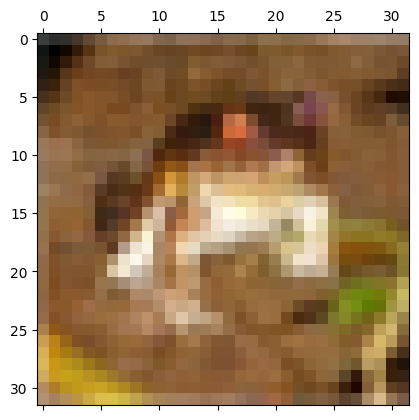

In [7]:
# first image from feature-train dataset output
plt.matshow(x_train[0])

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
y_train[0].shape

(1,)

In [72]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

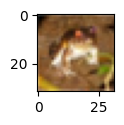

In [10]:
# more comfortable way to output images from train dataset

def plot_sample(index):
    plt.figure(figsize=(10, 1))
    plt.imshow(x_train[index])

plot_sample(0)

Frog


/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_7614/3739850039.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label)


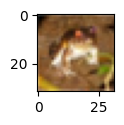

Truck


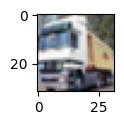

Truck


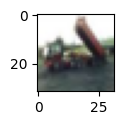

Deer


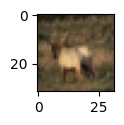

Auto


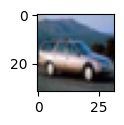

Auto


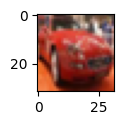

Bird


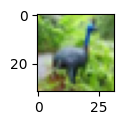

Horde


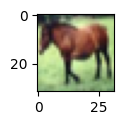

Ship


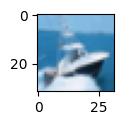

Cat


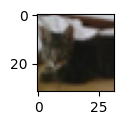

In [12]:
# example of a pipeline for a training data set
classes = ["Airplane", "Auto", "Bird", "Cat", "Deer", "Dog", "Frog", "Horde", "Ship", "Truck"]

for i in range(10):
    label = y_train[i]
    # convert y_train to int values, since the original data type is dtype=uint8
    # later, using encoding, I convert this categorical data into numeric data
    label = int(label)
    answer = classes[label]
    print(answer)
    plot_sample(i)
    plt.show()

In [13]:
# let's perform scaling by dividing the dataset by 255, since 255 is the maximum color value in RGB format

x_train_scalled = x_train/255
x_test_scalled = x_test/255

In [14]:
y_train[0]

array([6], dtype=uint8)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
# encoding - converting categorical data to numeric data

# in the keras.utils.to_categorical method we specify
# original dataset, number of classes and data type

y_train_catogorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype="float32",
)


y_test_catogorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype="float32",
)

In [23]:
y_test_catogorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [22]:
y_train_catogorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Frog


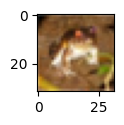

Truck


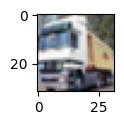

Truck


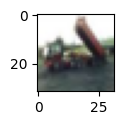

Deer


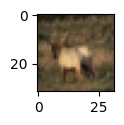

Auto


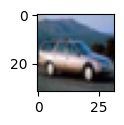

Auto


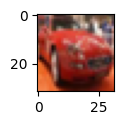

Bird


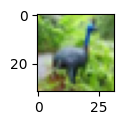

Horse


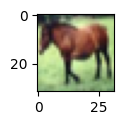

Ship


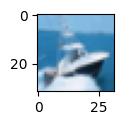

Cat


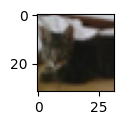

In [20]:
# so, after encoding, we transformed y_train_catogorical into a set of arrays by type

# ([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
#        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])


# where 1 means the image belongs to the class that corresponds to the unit index in the array
# for example the first image, which corresponds to the array ([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
# belongs to class 6, since the unit has an index of six

# accordingly, using the np.argmax method we calculate the largest element of the array, take its index
# apply this index to the list of classes, where it corresponds to its own class
                                                            


classes = ["Airplane", "Auto", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

for i in range(10):
    label = y_train_catogorical[i]
    label = np.argmax(label)
    answer = classes[label]
    print(answer)
    plot_sample(i)
    plt.show()

In [24]:
x_test.shape 

(10000, 32, 32, 3)

In [51]:
# in previous examples I smoothed the input layer separately using the reshape method and a ready-made one-dimensional vector was supplied to the network input
# in this case, I use a Flatten layer that smoothes the image into a one-dimensional vector while the network is running


model = keras.Sequential([
    Flatten(input_shape = (32, 32, 3)),
    # Dense(2500, activation = "relu"),
    Dense(3000, activation = "relu"),
    Dense(1000, activation = "relu"),
    Dense(10, activation = "sigmoid")
])


model.compile(optimizer="SGD",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

model.fit(x_train_scalled, y_train_catogorical, epochs=50)

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8081 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6214 - accuracy: 0.4284
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5399 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4806 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4314 - accuracy: 0.4944


In [67]:
print(f"An array with the probability of how much the first image corresponds to a particular class: {model.predict(x_test_scalled)[0]}")
print(f"The maximum array value that represents the class the image belongs to: {np.argmax(model.predict(x_test_scalled)[0])}")


313/313 [==============================] - 2s 5ms/step
Массив с вероятностью того, на сколько первое изображение соответсвует тому или иному классу: [0.42998657 0.56657803 0.76437    0.885291   0.33808753 0.8169526
 0.8092205  0.10113069 0.55891013 0.13575386]
313/313 [==============================] - 1s 5ms/step
Максимальное значение массива, которое представляет собой класс, к которому принадлежит изображение 3


In [53]:
# first prediction output
np.argmax(model.predict(x_test_scalled)[0])

313/313 [==============================] - 2s 5ms/step


3

313/313 [==============================] - 1s 5ms/step
Cat


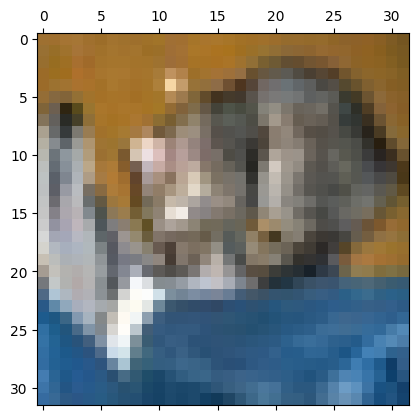

In [71]:
# other wat to output one specific answer by index choosing 
print(classes[np.argmax(model.predict(x_test_scalled)[0])])
plt.matshow(x_test_scalled[0])

In [48]:
model.evaluate(x_test_scalled, y_test_catogorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.4566 - accuracy: 0.4839


[1.4566013813018799, 0.4839000105857849]

313/313 [==============================] - 2s 5ms/step
Cat


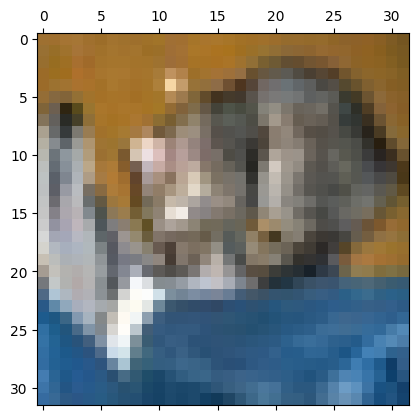

313/313 [==============================] - 2s 5ms/step
Truck


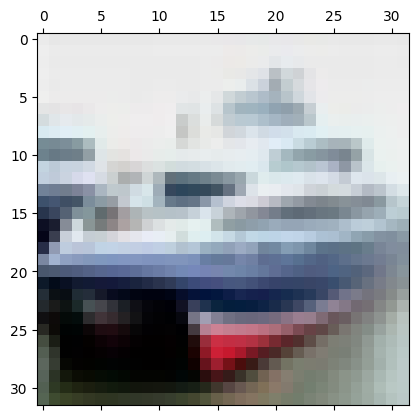

313/313 [==============================] - 2s 5ms/step
Ship


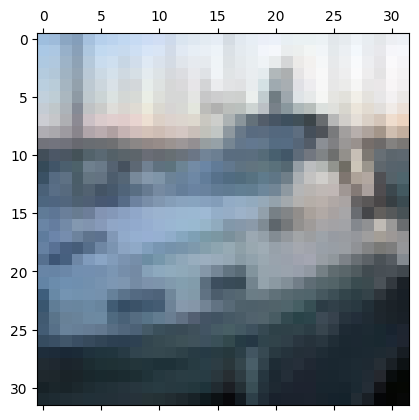

313/313 [==============================] - 2s 5ms/step
Airplane


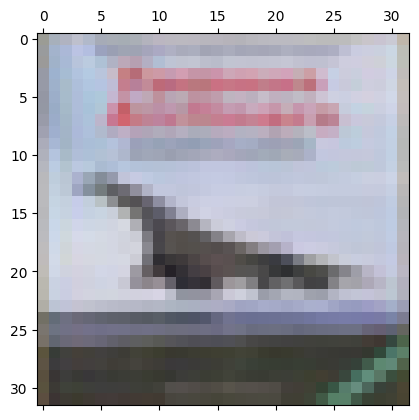

313/313 [==============================] - 2s 5ms/step
Deer


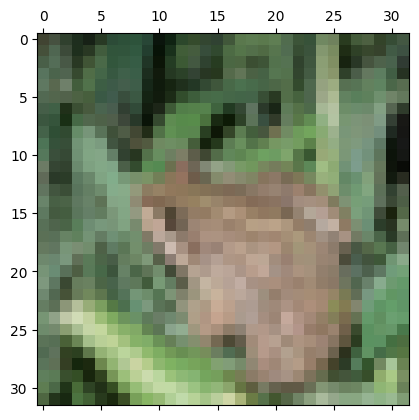

313/313 [==============================] - 2s 5ms/step
Frog


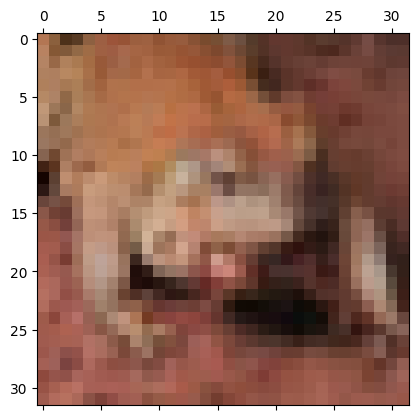

313/313 [==============================] - 1s 5ms/step
Cat


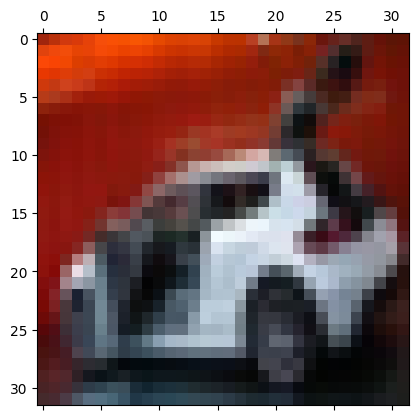

313/313 [==============================] - 1s 5ms/step
Frog


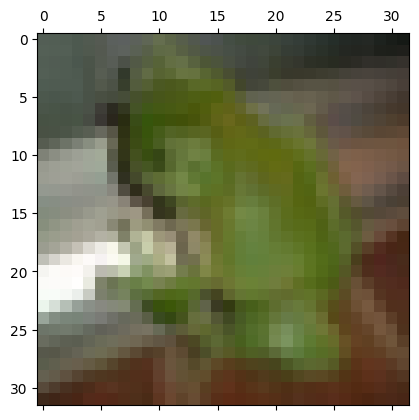

313/313 [==============================] - 2s 5ms/step
Bird


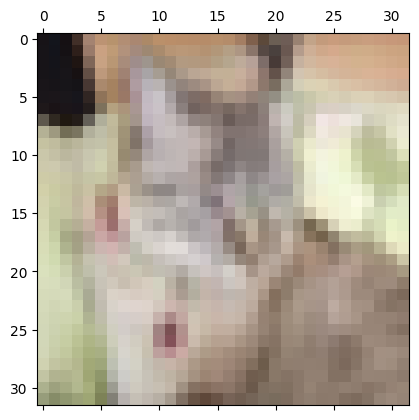

313/313 [==============================] - 2s 5ms/step
Auto


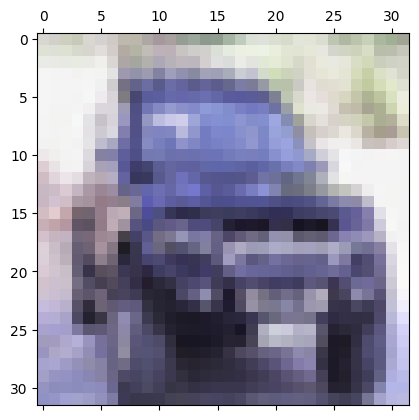

In [63]:
#prediction pipline 
# 10 - prediction number

classes = ["Airplane", "Auto", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

for i in range(10):
    num = np.argmax(model.predict(x_test_scalled)[i])
    plt.matshow(x_test_scalled[i])
    answer = classes[num]
    print(answer)
    plt.show()

In [49]:
# model info

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 1500)              4609500   
                                                                 
 dense_11 (Dense)            (None, 800)               1200800   
                                                                 
 dense_12 (Dense)            (None, 10)                8010      
                                                                 
Total params: 5818310 (22.20 MB)
Trainable params: 5818310 (22.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
